<a href="https://colab.research.google.com/github/shnj-inoue/setsumei2023_3/blob/main/heimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Numpyを使ったプログラムを作成します。

点A,B,Cの座標を通る平面の方程式を求めグラフ化します

点Aのx座標を-10から10までの整数で入力してください：1
点Aのy座標を-10から10までの整数で入力してください：2
点Aのz座標を-10から10までの整数で入力してください：3

点Bのx座標を-10から10までの整数で入力してください：2
点Bのy座標を-10から10までの整数で入力してください：4
点Bのz座標を-10から10までの整数で入力してください：7

点Cのx座標を-10から10までの整数で入力してください：3
点Cのy座標を-10から10までの整数で入力してください：3
点Cのz座標を-10から10までの整数で入力してください：3

点Aの座標：[1 2 3]
点Bの座標：[2 4 7]
点Cの座標：[3 3 3]
ABベクトル : [1 2 4]
ACベクトル : [2 1 0]
法線ベクトル : [-4  8 -3]


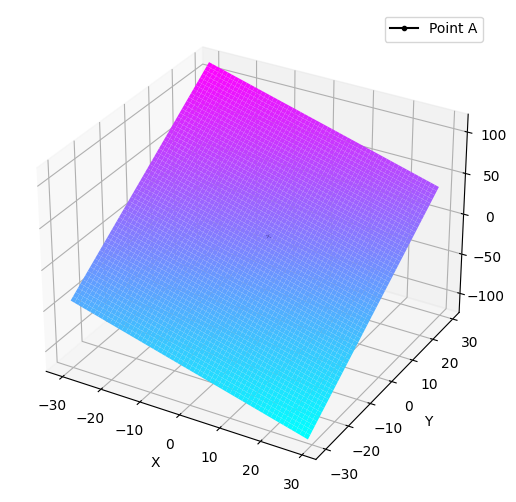

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

list_A  = []
list_B = []
list_C = []
axis = ["x","y","z"]

print("点A,B,Cの座標を通る平面の方程式を求めグラフ化します\n")

#各点の座標の入力
for _ in range(3):
    num = int(input("点Aの"+axis[_]+"座標を-10から10までの整数で入力してください："))
    list_A.append(num)
array_A = np.array(list_A)
print()

for _ in range(3):
    num = int(input("点Bの"+axis[_]+"座標を-10から10までの整数で入力してください："))
    list_B.append(num)
array_B = np.array(list_B)
print()

for _ in range(3):
    num = int(input("点Cの"+axis[_]+"座標を-10から10までの整数で入力してください："))
    list_C.append(num)
array_C = np.array(list_C)
print()

print("点Aの座標："+str(array_A))
print("点Bの座標："+str(array_B))
print("点Cの座標："+str(array_C))

vec_AB = array_B - array_A
vec_AC = array_C - array_A
cross_ABC = np.cross(vec_AB,vec_AC)    # np.cross(x,y) x と y の外積を求める
                                       # 外積が法線ベクトルになる

print("ABベクトル :",vec_AB)
print("ACベクトル :",vec_AC)
print("法線ベクトル :",cross_ABC)


fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)

x = np.arange(-30, 30)       # -30 ～ 30 の連番を作る
y = np.arange(-30, 30)
x, y = np.meshgrid(x, y)     # 上記の x, y で格子を作る
z = (cross_ABC[0]*array_A[0] + cross_ABC[1]*array_A[1] + cross_ABC[2]*array_A[2] - cross_ABC[0]*x - cross_ABC[1]*y) / cross_ABC[2]
# 平面方程式： cross_ABC[0]*(x-array_A[0]) + cross_ABC[1]*(y-array_A[1]) + cross_ABC[2]*(z-array_A[2]) = 0
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='cool', linewidth=0.3)
ax.plot(array_A[0],array_A[1],array_A[2],marker=".",color="black",label="Point A")
ax.legend()
plt.show()